In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tqdm import tqdm

from neural_network import NeuralNetwork
from methods import *
from data_gen import Poly1D2Deg, FrankeDataGen, CancerData
from iristest import test_iris

np.random.seed(4155) # FYS-STK4155 

/Users/miamerlid/anaconda3/envs/fysstk/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#test_iris()

In [3]:
input_size = 30
output_size = 1
hidden_layers = [32, 16]
network_shape = [input_size] + hidden_layers + [output_size]
activation_funcs = ["ReLU", "ReLU", "sigmoid"]
cost_fun = mse

epochs = 300
learning_rate = 0.001
batch_size = 1000

In [4]:
data = CancerData()
# check for nan values in data
print("NaN values in x:", data.x.isna().sum().sum())
print("NaN values in y:", data.y.isna().sum())
inputs = np.array(data.x)
targets = np.array(data.y)
inputs = (inputs - np.mean(inputs, axis=0)) / np.std(inputs, axis=0)


Dataset URL: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
NaN values in x: 0
NaN values in y: 0


In [5]:
grad_methods = ["Constant", "Momentum","Adagrad_Momentum", "Adam", "RMSprop", "Adagrad"]
losses = []
accuracies = []

for grad in tqdm(grad_methods):
    model = NeuralNetwork(network_shape, activation_funcs, cost_fun, "regression", grad)
    _, accuracy_list, loss_list, preds = model.train_network(inputs, targets, epochs=epochs, learning_rate=learning_rate, batch_size=batch_size, manuel_grads = False)
    losses.append(loss_list)
    accuracies.append(accuracy_list)

100%|██████████| 6/6 [00:12<00:00,  2.09s/it]


In [6]:
print(len(losses))

6


In [7]:
print(losses[0])

[Array(0.57477444, dtype=float32), Array(0.5747516, dtype=float32), Array(0.5747294, dtype=float32), Array(0.5747069, dtype=float32), Array(0.5746846, dtype=float32), Array(0.57466197, dtype=float32), Array(0.5746398, dtype=float32), Array(0.5746173, dtype=float32), Array(0.5745949, dtype=float32), Array(0.57457256, dtype=float32), Array(0.5745501, dtype=float32), Array(0.57452786, dtype=float32), Array(0.57450545, dtype=float32), Array(0.57448334, dtype=float32), Array(0.57446104, dtype=float32), Array(0.57443875, dtype=float32), Array(0.5744165, dtype=float32), Array(0.5743944, dtype=float32), Array(0.57437235, dtype=float32), Array(0.57435036, dtype=float32), Array(0.57432824, dtype=float32), Array(0.57430625, dtype=float32), Array(0.5742843, dtype=float32), Array(0.57426256, dtype=float32), Array(0.57424057, dtype=float32), Array(0.57421786, dtype=float32), Array(0.5741949, dtype=float32), Array(0.5741725, dtype=float32), Array(0.5741498, dtype=float32), Array(0.57412714, dtype=flo

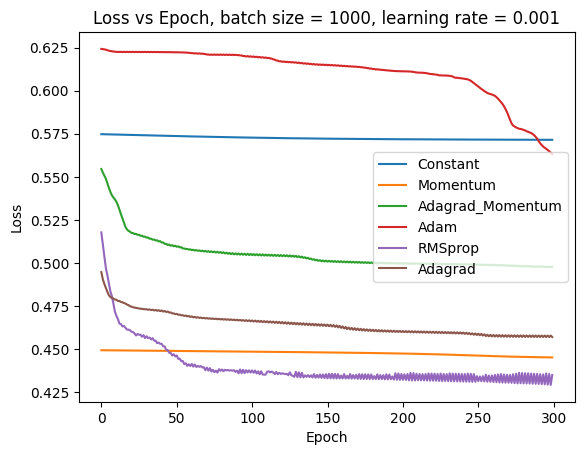

In [8]:
i = 0

for method, loss_list in zip(grad_methods, losses):
    if i in [0, 1, 2,3,4,5]:
        plt.plot(loss_list, label=method)
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.title(f"Loss vs Epoch, batch size = {batch_size}, learning rate = {learning_rate}")
        plt.legend()
    i += 1
plt.show()

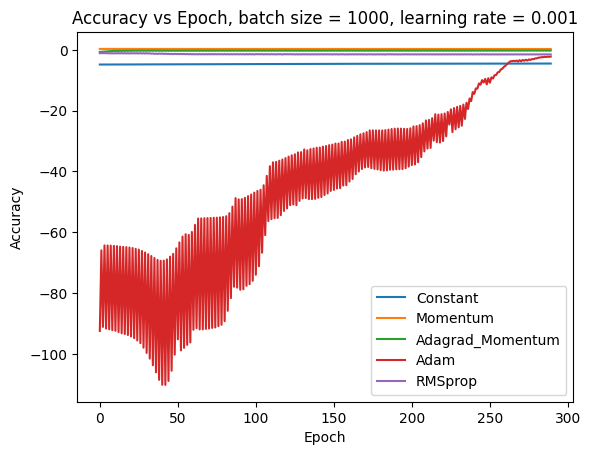

In [9]:
i = 0
for method, accuracy_list in zip(grad_methods, accuracies):
    if i in [0, 1,2, 3,4]:
        plt.plot(accuracy_list[10:], label=method)
        plt.xlabel("Epoch")
        plt.ylabel("Accuracy")
        plt.title(f"Accuracy vs Epoch, batch size = {batch_size}, learning rate = {learning_rate}")
        plt.legend()
    i += 1
plt.show()

### Regression


In [10]:
# stop notebook here 
import sys
sys.exit()


SystemExit: 

/Users/miamerlid/anaconda3/envs/fysstk/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [11]:
input_size = 2
output_size = 1
hidden_layers = [32, 16, 8]
network_shape = [input_size] + hidden_layers + [output_size]
activation_funcs = ["sigmoid", "sigmoid", "sigmoid", "identity"]
cost_fun = mse

epochs = 30
learning_rate = 0.001
batch_size = 1000

In [12]:
data = FrankeDataGen(noise=False)
inputs = jnp.column_stack((data.x.flatten(), data.y.flatten()))  
targets = data.z.ravel().reshape(-1, 1)   

In [16]:
grad_methods = ["Constant", "Momentum","Adagrad_Momentum", "Adam", "RMSprop", "Adagrad"]
losses = []
accuracies = []

for grad in tqdm(grad_methods):
    model = NeuralNetwork(network_shape, activation_funcs, cost_fun, "regression", grad)
    _, accuracy_list, loss_list, preds = model.train_network(inputs, targets, epochs=epochs, learning_rate=learning_rate, batch_size=batch_size, manuel_grads = True)  
    losses.append(loss_list)
    accuracies.append(accuracy_list)

100%|██████████| 6/6 [00:07<00:00,  1.20s/it]


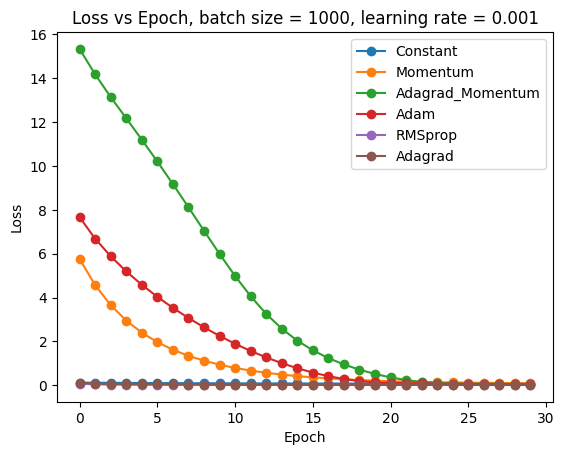

In [17]:
i = 0

for method, loss_list in zip(grad_methods, losses):
    if i in [0, 1, 2,3,4,5]:
        plt.plot(loss_list, label=method, marker="o")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.title(f"Loss vs Epoch, batch size = {batch_size}, learning rate = {learning_rate}")
        plt.legend()
    i += 1
plt.show()

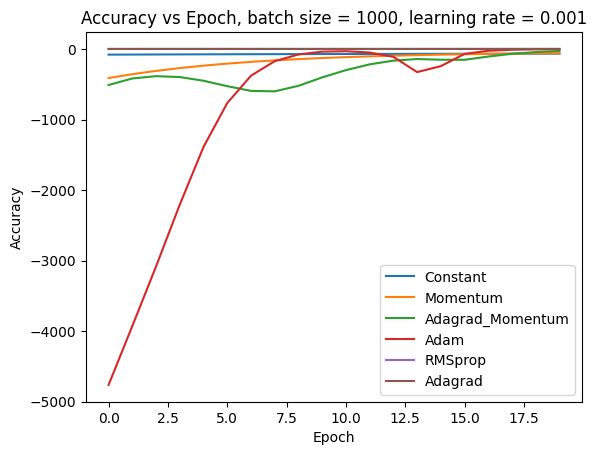

In [18]:
i = 0
for method, accuracy_list in zip(grad_methods, accuracies):
    if i in [0, 1,2, 3,4,5]:
        plt.plot(accuracy_list[10:], label=method)
        plt.xlabel("Epoch")
        plt.ylabel("Accuracy")
        plt.title(f"Accuracy vs Epoch, batch size = {batch_size}, learning rate = {learning_rate}")
        plt.legend()
    i += 1
plt.show()